In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import glob

# Specify the path to your CSV files
csv_files = glob.glob('/Users/grey/Desktop/github/cloudmesh-community/cm/paper-frontiers-workflow/bin/*.csv')

# Initialize an empty list to store DataFrames
dataframes = []

# Loop through each CSV file and read it
for file in csv_files:
    df = pd.read_csv(file)
    dataframes.append(df)


In [3]:
df1 = df[['Name', 'Rank', 'Rmax [TFlop/s]']]
df1['Rmax [TFlop/s]'] = df1['Rmax [TFlop/s]'].str.replace(',', '').astype(float)

df1


/var/folders/q5/s8_pcggn5f73xnz11zjqrhlw0000gp/T/ipykernel_91993/72953266.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Rmax [TFlop/s]'] = df1['Rmax [TFlop/s]'].str.replace(',', '').astype(float)


,Name,Rank,Rmax [TFlop/s]
0,Frontier,1,1206000.00
1,Aurora,2,1012000.00
2,Eagle,3,561200.00
3,Supercomputer Fugaku,4,442010.00
4,LUMI,5,379700.00
...,...,...,...
495,Hercules,496,2136.34
496,Phoenix - 2022,497,2134.00
497,Betty,498,2133.00
498,NA3,499,2132.20


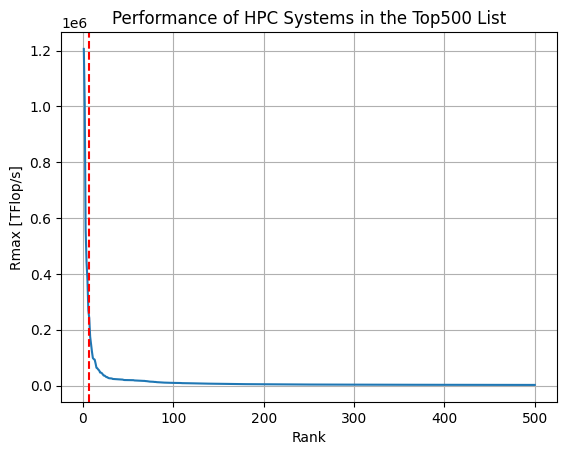

In [17]:

# Step 2: Create a line plot
sns.lineplot(data=df1, x='Rank', y='Rmax [TFlop/s]')

# Step 3: Customize the plot
plt.title('Performance of HPC Systems in the Top500 List')
plt.xlabel('Rank')
plt.ylabel('Rmax [TFlop/s]')
plt.grid(True)

plt.axvline(x=7, color='red', linestyle='--', label='Vertical Line at x=7')

plt.savefig('top500.pdf', format='pdf', bbox_inches = 'tight')  # Save as PDF
plt.savefig('top500.png', format='png', dpi=300, bbox_inches = 'tight')  # Save as PNG with 300 DPI

# Step 4: Show the plot
plt.show()

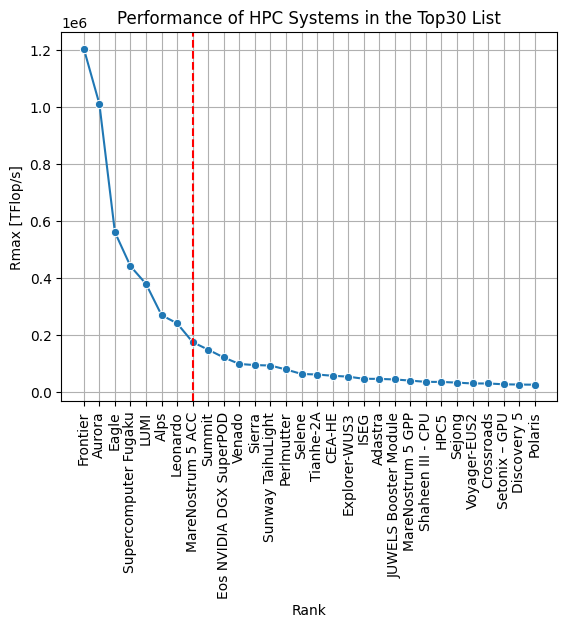

In [18]:
n = 30
df_sub = df1.head(n)

# Step 2: Create a line plot
sns.lineplot(data=df_sub, x='Name', y='Rmax [TFlop/s]', marker='o')

# Step 3: Customize the plot
plt.title(f'Performance of HPC Systems in the Top{n} List')
plt.xlabel('Rank')
plt.ylabel('Rmax [TFlop/s]')
plt.grid(True)
plt.xticks(rotation=90)
plt.axvline(x=7, color='red', linestyle='--', label='Vertical Line at x=7')


plt.savefig(f'top{n}.pdf', format='pdf', bbox_inches = 'tight')  # Save as PDF
plt.savefig(f'top{n}.png', format='png', dpi=300, bbox_inches = 'tight')  # Save as PNG with 300 DPI

# Step 4: Show the plot
plt.show()

In [8]:
df1


,Name,Rank,Rmax [TFlop/s]
0,Frontier,1,1206000.00
1,Aurora,2,1012000.00
2,Eagle,3,561200.00
3,Supercomputer Fugaku,4,442010.00
4,LUMI,5,379700.00
...,...,...,...
495,Hercules,496,2136.34
496,Phoenix - 2022,497,2134.00
497,Betty,498,2133.00
498,NA3,499,2132.20


In [15]:
arr = df1['Rmax [TFlop/s]'].tolist()

print (arr)

def find_equilibrium_index(arr):
    total_sum = sum(arr)
    left_sum = 0
    
    for i in range(len(arr)):
        # Check if left_sum equals the sum of elements to the right of index i
        if left_sum == total_sum - left_sum - arr[i]:
            return i
        left_sum += arr[i]
        print(left_sum, total_sum - left_sum)
    
    return -1  # Return -1 if no such index is found

# Example usage

index = find_equilibrium_index(arr)
print(f"The equilibrium index is: {index}")

[1206000.0, 1012000.0, 561200.0, 442010.0, 379700.0, 270000.0, 241200.0, 175300.0, 148600.0, 121400.0, 98510.0, 94640.0, 93014.59, 79230.0, 63460.0, 61444.5, 57110.0, 53960.0, 46540.0, 46100.0, 44120.0, 40101.8, 35658.3, 35450.0, 32970.0, 30050.0, 30034.7, 27160.0, 26130.0, 25810.0, 25460.0, 25177.0, 23516.4, 23320.0, 23320.0, 23237.6, 22400.0, 22300.0, 22208.72, 22121.0, 21850.0, 21530.0, 21230.0, 21210.0, 20158.7, 19650.0, 19650.0, 19650.0, 19539.0, 19476.6, 19458.3, 19334.0, 19256.0, 19200.0, 19140.0, 19070.0, 18200.0, 18002.8, 18002.8, 17860.0, 17221.0, 17200.0, 17190.5, 16592.0, 16590.0, 16590.0, 16590.0, 16590.0, 16020.0, 15940.0, 15470.0, 14940.0, 14240.0, 14014.7, 13929.3, 13816.66, 13367.0, 13367.0, 12810.0, 12800.0, 12210.0, 11965.5, 11950.0, 11616.8, 11372.2, 11164.0, 10680.7, 10530.0, 10520.0, 10380.0, 10324.0, 10111.0, 10013.0, 10013.0, 9990.7, 9950.26, 9682.0, 9508.36, 9459.0, 9444.0, 9357.4, 9330.0, 9264.31, 9087.0, 9070.0, 9000.0, 8987.13, 8983.0, 8620.0, 8500.0, 8487.0